In [1]:
import os, sys, glob, json, scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
os.chdir("../")
path = os.getcwd()
sys.path.insert(0, path)
import GWGen
from GWGen.WFGenerator import *

In [2]:
foldpath = os.getcwd()+"/Data/Output/"
filenames = glob.glob(foldpath+"*.json")
data = []
for file in filenames:
    with open(file, "r") as f:
        data.append(json.load(f))
data[-1]
datframe = pd.DataFrame(data)
datframe

,SMBHMASS,SecondaryMass,PROCAMASS,p0,e0,BHSpin,Trajectory Exit Reason,mismatch,faithfulness,snr2,DeltaNOrbits
0,10000000.0,10,1.000000e-18,4.8300,0.1,0.63,Separatrix reached!,1.136090e-04,0.999930,0.657855,-5.371947e-03
1,10000000.0,10,1.000000e-18,4.8300,0.2,0.63,Integration reached time boundary. Boundary lo...,7.105427e-15,1.000000,0.534678,4.979420e-10
2,10000000.0,10,1.000000e-18,4.8300,0.3,0.63,Integration reached time boundary. Boundary lo...,2.997602e-15,1.000000,0.502107,2.686571e-10
3,10000000.0,10,1.000000e-18,4.7950,0.4,0.63,Integration reached time boundary. Boundary lo...,4.329870e-15,1.000000,0.442018,2.547610e-10
4,10000000.0,10,1.000000e-18,4.7600,0.5,0.63,Integration reached time boundary. Boundary lo...,-2.220446e-16,1.000000,0.324614,8.453434e-11
...,...,...,...,...,...,...,...,...,...,...,...
15986,2000000.0,10,3.000000e-18,8.7275,0.6,0.80,Separatrix reached!,0.000000e+00,1.000000,147.720948,0.000000e+00
15987,2000000.0,10,3.000000e-18,8.5550,0.7,0.80,Separatrix reached!,0.000000e+00,1.000000,165.026862,0.000000e+00
15988,2000000.0,10,4.000000e-18,9.0500,0.1,0.80,Separatrix reached!,6.894027e-05,0.999733,99.771701,1.186051e-04
15989,2000000.0,10,4.000000e-18,9.0175,0.2,0.80,Separatrix reached!,6.860551e-05,0.999742,103.587789,1.313553e-04


In [3]:
xdat = datframe["SMBHMASS"]
ydat = datframe["PROCAMASS"]
zdat = datframe["faithfulness"]

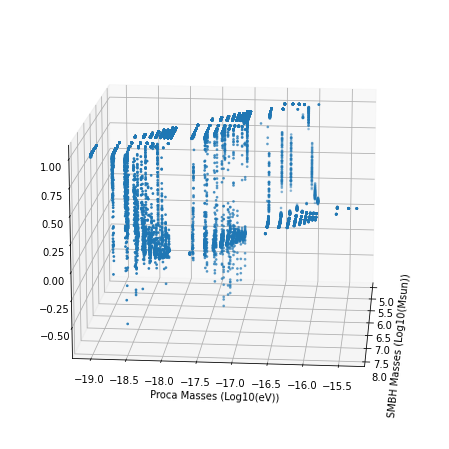

In [4]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(np.log10(xdat), np.log10(ydat), zdat,s=3)
ax.set_ylabel("Proca Masses (Log10(eV))")
ax.set_xlabel("SMBH Masses (Log10(Msun))")
ax.view_init(15,5)

In [5]:
print(datframe["BHSpin"].unique())
print(datframe["e0"].unique())
datframe["SMBHMASS"].unique()

[0.63 0.66 0.6  0.7  0.9  0.86 0.73 0.83 0.8  0.76]
[0.1 0.2 0.3 0.4 0.5 0.6 0.7]


array([10000000., 50000000.,  8000000., 30000000.,  3000000., 20000000.,
         700000.,  4000000.,  6000000.,  9000000.,   100000.,  2000000.,
        1000000., 60000000.,  7000000.,   300000.,   400000.,   500000.,
         800000.,   200000., 80000000.,   600000.,  5000000., 90000000.,
         900000., 40000000., 70000000.])

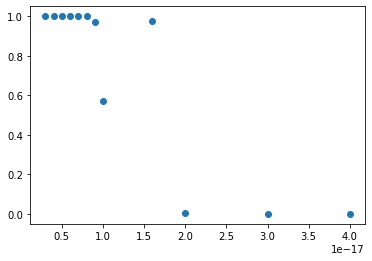

In [6]:
bhmass = 1000000
e0 = 0.7
bhspin = 0.9
newdat = datframe[(datframe["SMBHMASS"]==bhmass)&(datframe["e0"]==e0)&(datframe["BHSpin"]==bhspin)]
xdat = newdat["PROCAMASS"]
ydat = (newdat["snr2"])**(1/2)
zdat = newdat["faithfulness"]
plt.scatter(xdat,zdat)